# Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Sales.csv', encoding='latin1')

In [5]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
df.shape

(11251, 15)

In [7]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [9]:
df.drop(['Status','Age','unnamed1'], axis=1, inplace=True)

In [10]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [14]:
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
dtype: object

In [15]:
df['Amount'] = df['Amount'].astype('int')

In [16]:
df['Amount'].dtypes

dtype('int64')

In [17]:
df.dtypes

User_ID              int64
Cust_name           object
Product_ID          object
Gender              object
Age Group           object
Marital_Status       int64
State               object
Zone                object
Occupation          object
Product_Category    object
Orders               int64
Amount               int64
dtype: object

In [18]:
df.rename(columns= {'Marital_Status':'Married'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Married,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,0,Karnataka,Southern,Agriculture,Office,3,206


In [20]:
df['Age Group'].value_counts()

26-35    4541
36-45    2283
18-25    1879
46-50     983
51-55     830
55+       427
0-17      296
Name: Age Group, dtype: int64

In [21]:
def categorize_age(age_group):
    if "0-17" in age_group:
        return "Young Age"
    elif "18-25" in age_group:
        return "Young Age"
    elif "26-35" in age_group:
        return "Young Age"
    elif "36-45" in age_group:
        return "Middle Age"
    elif "46-50" in age_group:
        return "Middle Age"
    elif "51-55" in age_group:
        return "Old Age"
    elif "55+" in age_group:
        return "Old Age"
    else:
        return "Unknown"  

In [22]:
df['Age Group'] = df['Age Group'].astype(str) 

In [23]:
df['Age Group'] = df['Age Group'].apply(categorize_age)

In [24]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,Young Age,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,Young Age,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,Young Age,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,Young Age,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,Young Age,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,Young Age,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,Young Age,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,Middle Age,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,Middle Age,0,Karnataka,Southern,Agriculture,Office,3,206


In [25]:
df.dtypes

User_ID              int64
Cust_name           object
Product_ID          object
Gender              object
Age Group           object
Marital_Status       int64
State               object
Zone                object
Occupation          object
Product_Category    object
Orders               int64
Amount               int64
dtype: object

In [27]:
df.describe()

,User_ID,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,0.420055,2.489634,9453.610553
std,1.716039e+03,0.493589,1.114967,5222.355168
min,1.000001e+06,0.000000,1.000000,188.000000
25%,1.001492e+06,0.000000,2.000000,5443.000000
50%,1.003064e+06,0.000000,2.000000,8109.000000
75%,1.004426e+06,1.000000,3.000000,12675.000000
max,1.006040e+06,1.000000,4.000000,23952.000000


# Exploratory Data Analysis - EDA

In [28]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x150424210>,
 [Text(-0.6377514624666223, 0.896255026274154, ''),
  Text(0.6377515463800714, -0.8962549665635487, '')])

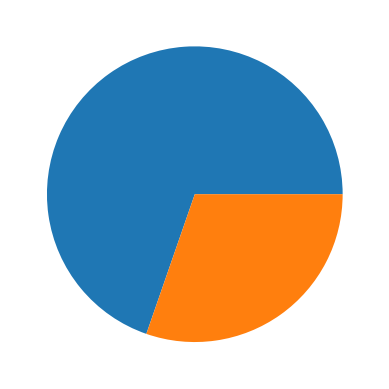

In [22]:
plt.pie(df["Gender"].value_counts())

<Axes: xlabel='Gender', ylabel='Amount'>

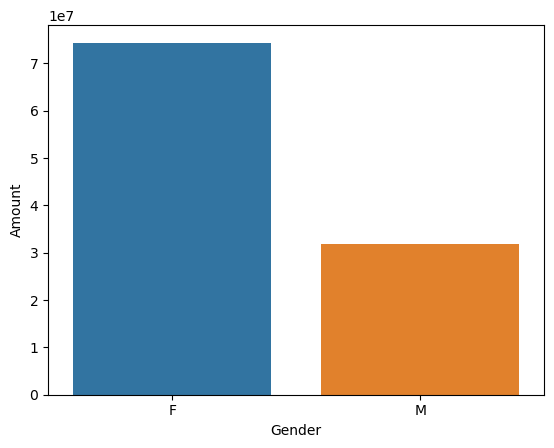

In [36]:
data_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender',y='Amount',data=data_gen)

([<matplotlib.patches.Wedge at 0x13e5384d0>,
 [Text(-0.3318962794992573, 1.0487348853044562, ''),
  Text(-0.04933361409413877, -1.0988931679287166, ''),
  Text(1.0327945422263065, -0.37859666341312936, '')])

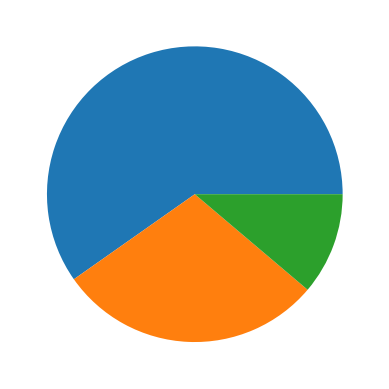

In [37]:
plt.pie(df["Age Group"].value_counts())

<Axes: xlabel='Age Group', ylabel='count'>

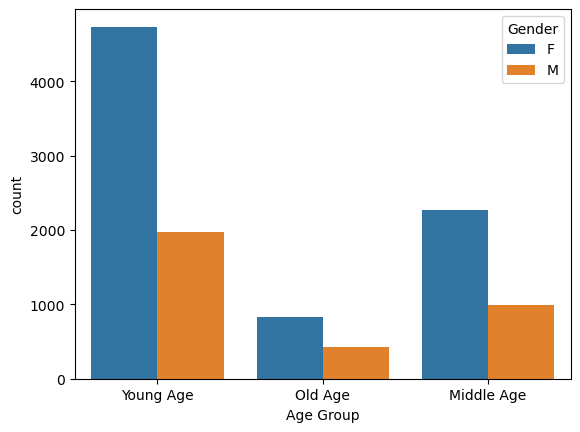

In [38]:
Age = sns.countplot(data=df,x='Age Group',hue='Gender')
Age

<Axes: xlabel='Age Group', ylabel='Amount'>

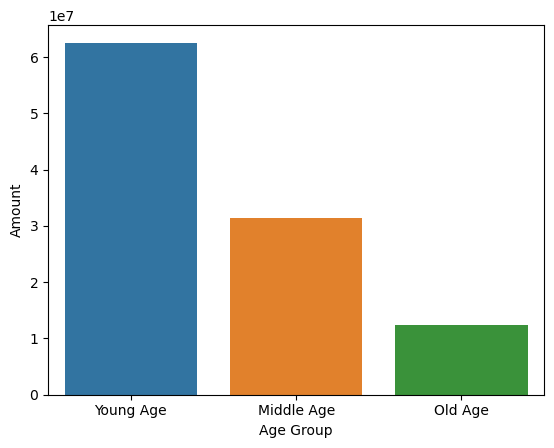

In [39]:
data_age=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=data_age)

<Axes: xlabel='Zone', ylabel='Orders'>

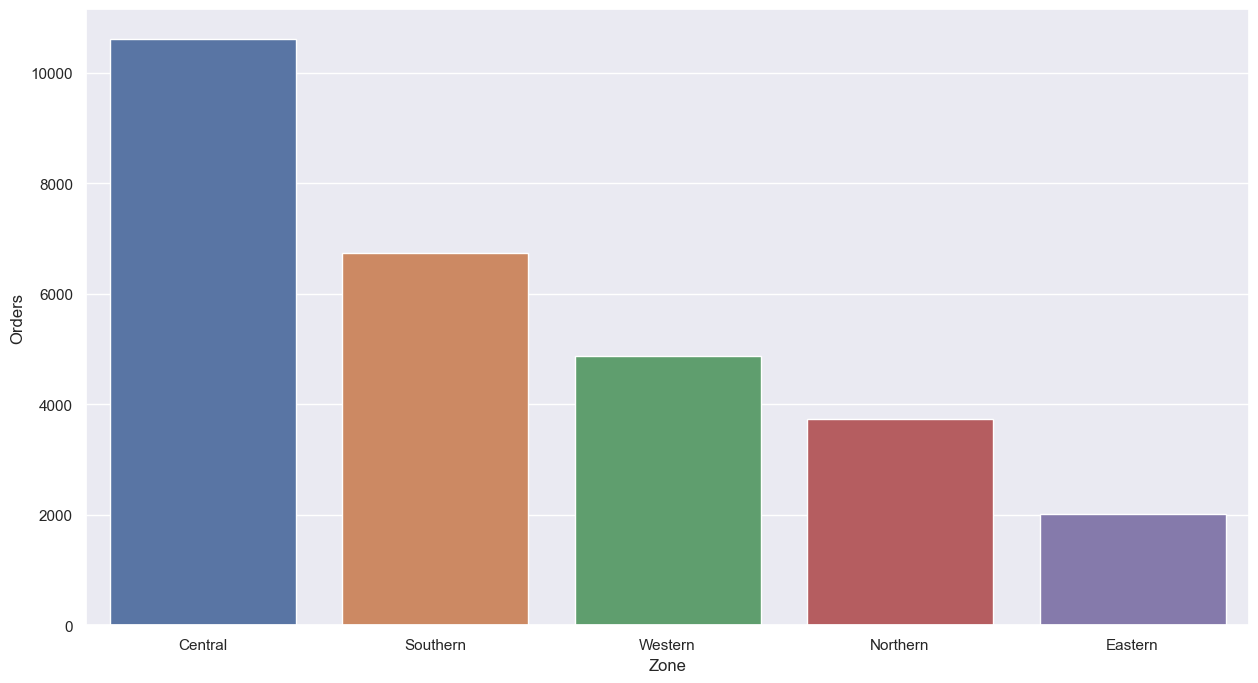

In [45]:
data_zone = df.groupby(['Zone'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)
sns.barplot(x = 'Zone',y= 'Orders',data =data_zone)

/var/folders/hl/qyscz2_s5y19x37908srgqw40000gn/T/ipykernel_956/1978026160.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(df,x="Gender",y="Orders",palette="highlight")


<Axes: xlabel='Gender', ylabel='Orders'>

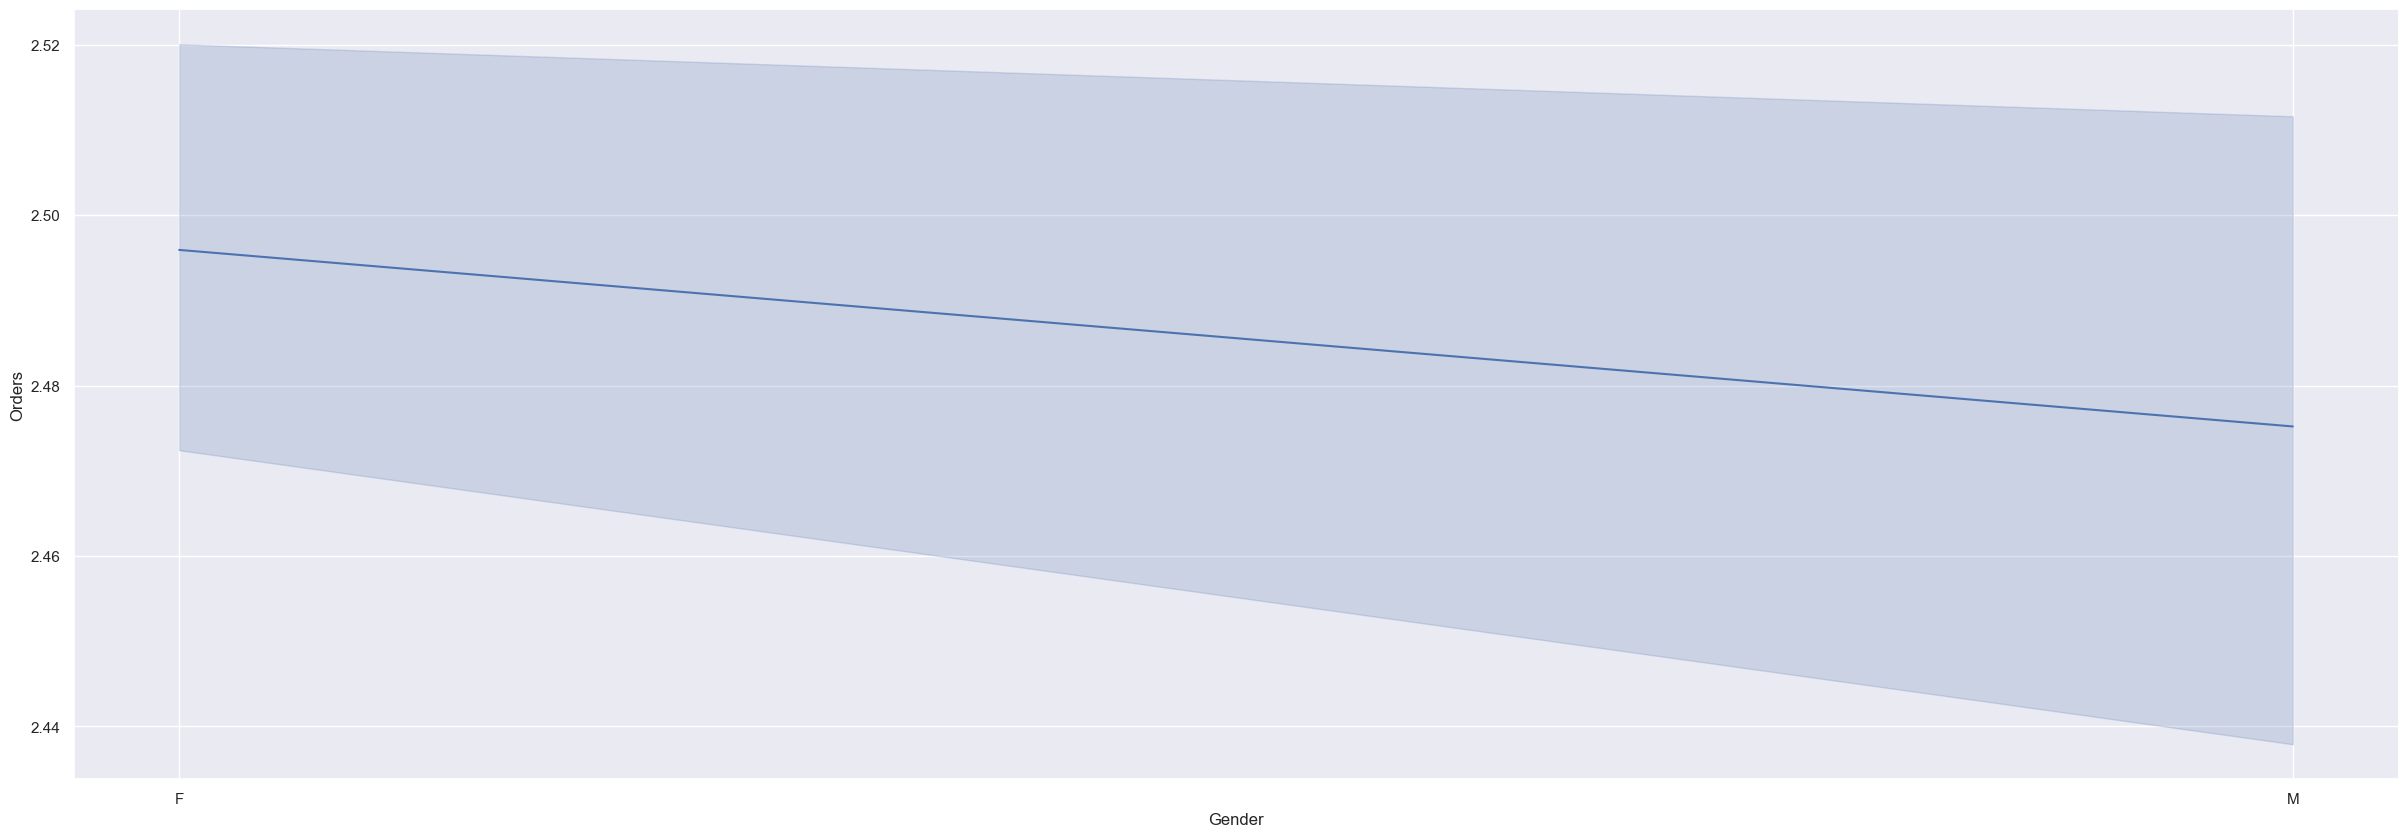

In [52]:
plt.subplots(figsize=(30,10))
sns.lineplot(df,x="Gender",y="Orders",palette="highlight")

/var/folders/hl/qyscz2_s5y19x37908srgqw40000gn/T/ipykernel_956/3122184421.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df,x="Gender",y="Amount",palette="muted")


<Axes: xlabel='Gender', ylabel='Amount'>

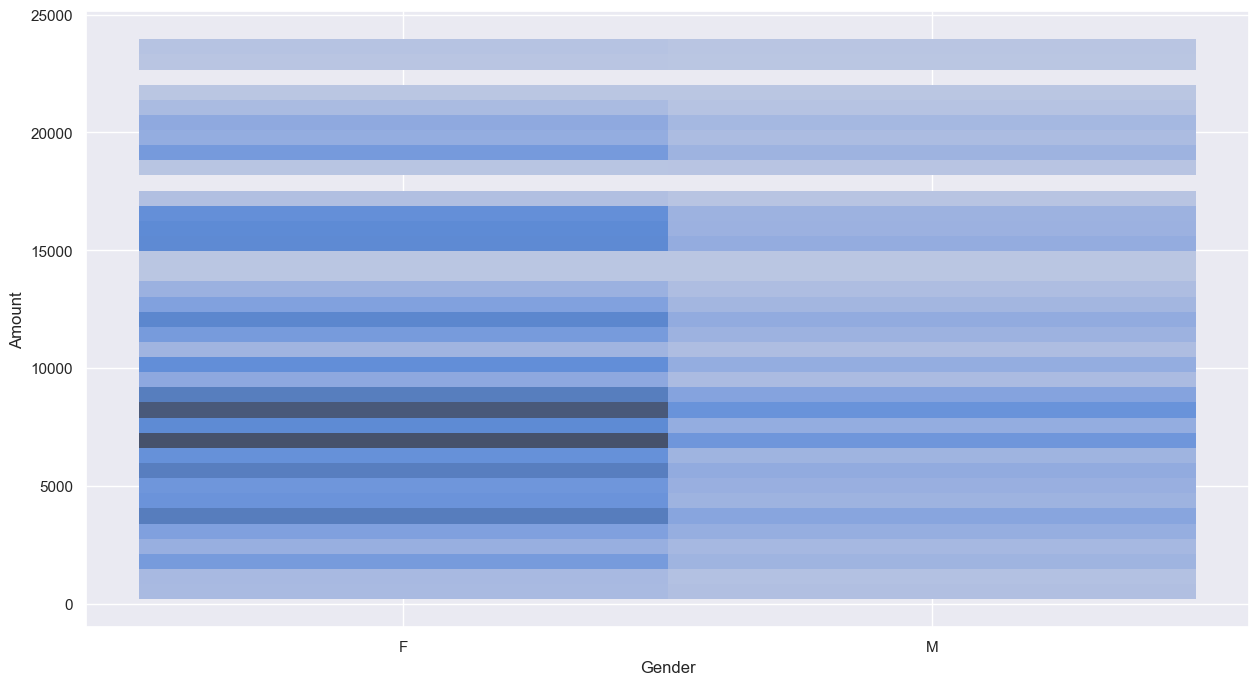

In [53]:
sns.histplot(df,x="Gender",y="Amount",palette="muted")

<Axes: xlabel='Orders', ylabel='Zone'>

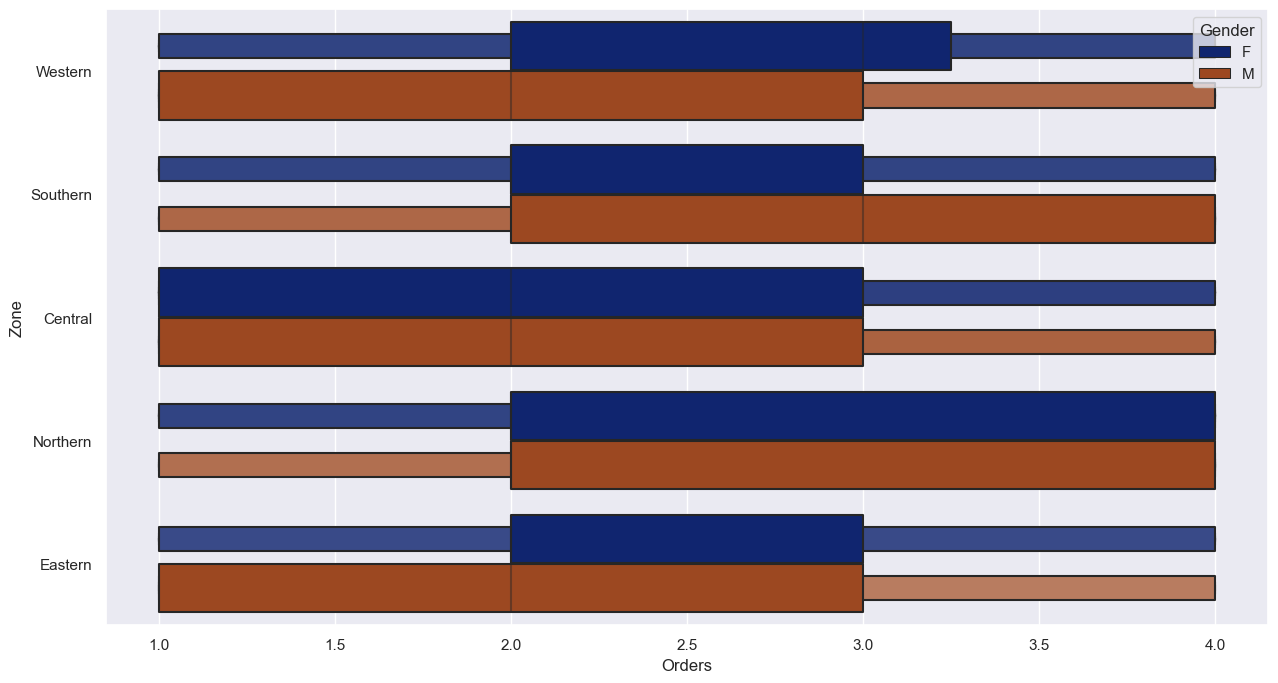

In [54]:
sns.boxenplot(data=df,x="Orders",y="Zone",palette="dark",hue='Gender')

In [55]:
corr_loan=df.corr()

/var/folders/hl/qyscz2_s5y19x37908srgqw40000gn/T/ipykernel_956/2261496584.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_loan=df.corr()


In [56]:
corr_loan

,User_ID,Marital_Status,Orders,Amount
User_ID,1.000000,0.004345,-0.016022,-0.011997
Marital_Status,0.004345,1.000000,-0.003487,-0.017493
Orders,-0.016022,-0.003487,1.000000,-0.013184
Amount,-0.011997,-0.017493,-0.013184,1.000000


<Axes: >

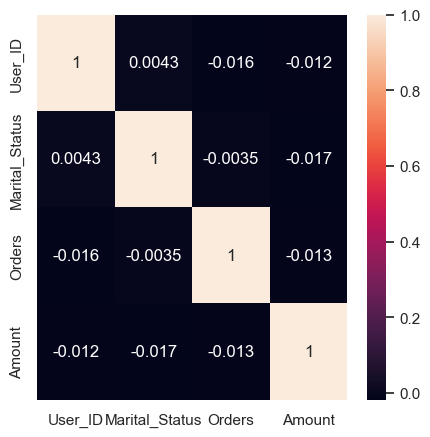

In [57]:
plt.figure(figsize=(5,5))
sns.heatmap(corr_loan,annot=True)

/var/folders/hl/qyscz2_s5y19x37908srgqw40000gn/T/ipykernel_956/1236343304.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df,x="Orders",y="Amount",palette="dark")


<Axes: xlabel='Orders', ylabel='Amount'>

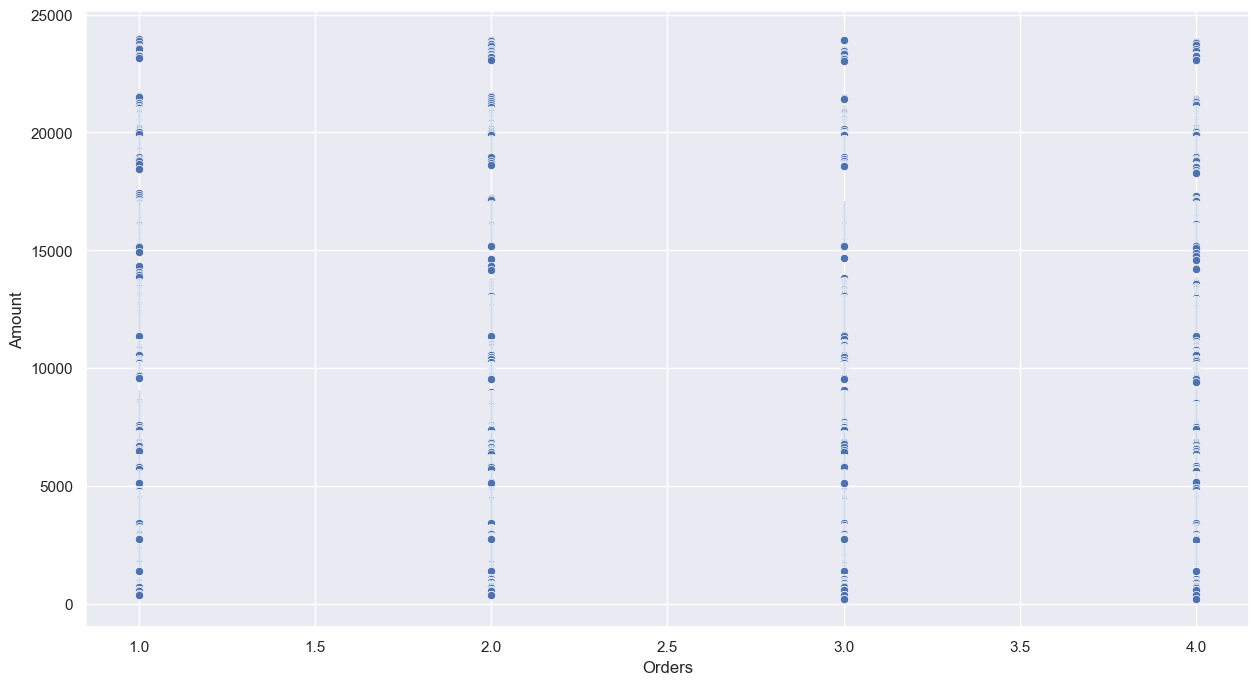

In [58]:
sns.scatterplot(data=df,x="Orders",y="Amount",palette="dark")

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from  sklearn.cluster import KMeans
from sklearn import svm

In [60]:
label_encoder = LabelEncoder()

In [71]:
df['Age Group'] = label_encoder.fit_transform(df['Age Group'])
df['State'] = label_encoder.fit_transform(df['State'])
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
df['Product_Category'] = label_encoder.fit_transform(df['Product_Category'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Zone'] = label_encoder.fit_transform(df['Zone'])
df['Cust_name'] = label_encoder.fit_transform(df['Cust_name'])
df['Product_ID'] = label_encoder.fit_transform(df['Product_ID'])

In [72]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,991,774,0,2,0,10,4,8,0,1,23952
1,1000732,596,644,0,2,1,0,3,7,0,3,23934
2,1001990,150,714,0,2,1,14,0,1,0,3,23924
3,1001425,1102,1507,1,2,0,7,3,5,0,2,23912
4,1000588,574,387,1,2,1,3,4,6,0,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,698,1888,1,2,1,10,4,4,12,4,370
11247,1004089,938,1039,1,2,0,4,2,8,17,3,367
11248,1001209,844,1263,0,0,0,9,0,14,12,4,213
11249,1004023,817,396,1,0,0,7,3,0,12,3,206


In [73]:
df['Orders'].value_counts()

2    2893
1    2808
4    2773
3    2765
Name: Orders, dtype: int64

# Train Test Split

In [74]:
X=df.drop(columns=['Orders'],axis=1)
Y=df['Orders']

In [75]:
X

,User_ID,Cust_name,Product_ID,Gender,Age Group,Marital_Status,State,Zone,Occupation,Product_Category,Amount
0,1002903,991,774,0,2,0,10,4,8,0,23952
1,1000732,596,644,0,2,1,0,3,7,0,23934
2,1001990,150,714,0,2,1,14,0,1,0,23924
3,1001425,1102,1507,1,2,0,7,3,5,0,23912
4,1000588,574,387,1,2,1,3,4,6,0,23877
...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,698,1888,1,2,1,10,4,4,12,370
11247,1004089,938,1039,1,2,0,4,2,8,17,367
11248,1001209,844,1263,0,0,0,9,0,14,12,213
11249,1004023,817,396,1,0,0,7,3,0,12,206


In [76]:
Y

0        1
1        3
2        3
3        2
4        2
        ..
11246    4
11247    3
11248    4
11249    3
11250    3
Name: Orders, Length: 11239, dtype: int64

In [77]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.20,stratify=Y,random_state=2)


In [78]:
print(X.shape, X_train.shape, X_test.shape)

(11239, 11) (8991, 11) (2248, 11)


# ML Algorithms

# Logistic Regression

In [79]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [80]:
x_train_prediction = lr.predict(X_train)
tr_data_accuracy= accuracy_score(x_train_prediction,Y_train)

In [81]:
tr_data_accuracy

0.2573684795907018

In [82]:
x_test_prediction = lr.predict(X_test)
te_data_accuracy= accuracy_score(x_test_prediction,Y_test)

In [83]:
te_data_accuracy

0.25756227758007116

# Naive byes

In [84]:
sc=StandardScaler()
x_train1=sc.fit_transform(X_train)
x_test1=sc.fit_transform(X_test)

In [85]:
model1 = GaussianNB()

In [86]:
model1.fit(x_train1,Y_train)

GaussianNB()

In [87]:
prd1=model1.predict(x_test1)
prd1

array([2, 2, 2, ..., 2, 1, 4])

In [88]:
acc1=accuracy_score(Y_test,prd1)

In [89]:
acc1

0.24733096085409254

# Random Forest

In [90]:
models2 = dict()

In [91]:
r= RandomForestClassifier(n_estimators=100)

In [92]:
r.fit(X_train,Y_train)

RandomForestClassifier()

In [93]:
X_test_prediction = r.predict(X_test)
test_data_accuracy= accuracy_score(X_test_prediction,Y_test)

In [94]:
test_data_accuracy

0.2442170818505338

# Decision Tree

In [95]:
models3 = dict()

In [96]:
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [97]:
X_test_prediction = tree.predict(X_test)
test_data_accuracy= accuracy_score(X_test_prediction,Y_test)

In [98]:
test_data_accuracy

0.27402135231316727

# K-Nearest neighbour

In [99]:
wcss=[]

In [100]:
for k in range(1,11):
    k_mean=KMeans(n_clusters= k, init='k-means++', max_iter=300, n_init=10,random_state=46)
    k_mean.fit(X)
    wcss.append(k_mean.inertia_)

In [101]:
wcss

[345885748330.88873,
 123774008558.66618,
 79735265587.01996,
 62142473390.06348,
 52028722494.00926,
 42468459119.93707,
 37203459067.95261,
 33065429030.78688,
 29686317520.16097,
 26949220695.415104]

In [102]:
k=4
k_mean=KMeans(n_clusters=k)
k_mean.fit(X)

/Users/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [103]:
X_test_prediction = k_mean.predict(X_test)
test_data_accuracy= accuracy_score(X_test_prediction,Y_test)

In [104]:
test_data_accuracy

0.1632562277580071

In [118]:
algorithms = ["Logistic Regression","Naive Byes","Random Forest","Decision Tree","K-Means"]
scores = [0.25756227758007116,0.24733096085409254,0.2442170818505338,0.27402135231316727,0.1632562277580071] 

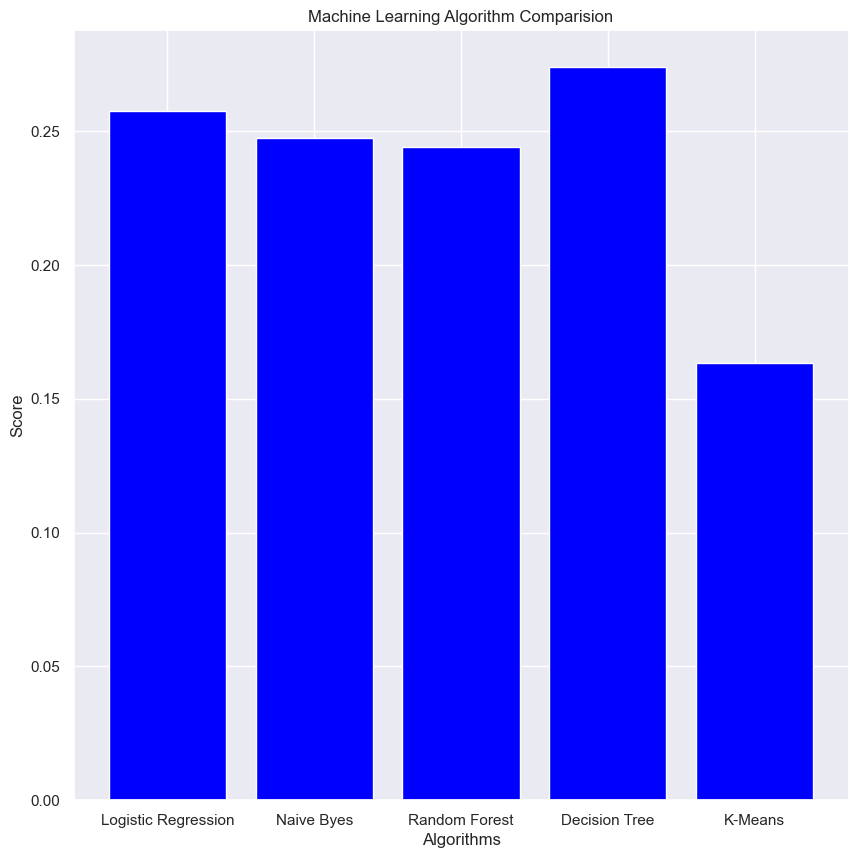

In [119]:
plt.figure(figsize=(10, 10))  

plt.bar(algorithms, scores, color='blue')
plt.xlabel('Algorithms')
plt.ylabel('Score')
plt.title('Machine Learning Algorithm Comparision')
plt.show()

In [120]:
import joblib

In [121]:
joblib.dump(tree,'Orders_Predict')

['Orders_Predict']

In [122]:
model=joblib.load('Orders_Predict')

In [123]:
df2=pd.DataFrame({
    'User_ID':1002903,
    'Cust_name':991,
    'Product_ID':774,
    'Gender':0,
    'Age Group':2,
    'Marital_Status':0,
    'State':10,
    'Zone':4,
    'Occupation':8,
    'Product_Category':0,
    'Amount':23952
},index=[0])

In [124]:
df2

,User_ID,Cust_name,Product_ID,Gender,Age Group,Marital_Status,State,Zone,Occupation,Product_Category,Amount
0,1002903,991,774,0,2,0,10,4,8,0,23952


In [125]:
result=model.predict(df2)

In [126]:
if result ==1:
    print("Congratulation! Your Orders Is Correct")
else:
    print("Sorry... Your Ordes Is Incorrect")

Congratulation! Your Orders Is Correct
